In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import torch.nn as nn
import time
import io
import copy
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import torchattacks

from torchmetrics.functional.image import peak_signal_noise_ratio, structural_similarity_index_measure

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Model Initialization

In [3]:

# Load the trained model
num_classes = 7
preprocessing = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

model = models.mobilenet_v3_small()
model.classifier = nn.Sequential(
    nn.Linear(in_features=576, out_features=1024, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1024, out_features=7, bias=True)
  )

model = model.to(device)

checkpoint = torch.load('./best_trained_models/best_ARD_Alpha=0.7_Temperature=5_Mobilenetv3Small_v4_epoch55.pth')

if 'module' in list(checkpoint['net'].keys())[0]:
    new_state_dict = {k.replace("module.", ""): v for k, v in checkpoint['net'].items()}
    model.load_state_dict(new_state_dict)
else:
    model.load_state_dict(checkpoint['net'])

model = model.to(device)
model.eval()


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

### Measure SSIM and PSNR

In [4]:
trash_test_dataset = torchvision.datasets.ImageFolder('./dataset/trashbox/test', transform=preprocessing)
trash_test_loader = torch.utils.data.DataLoader(dataset=trash_test_dataset, shuffle=False, batch_size=64)

In [5]:
examples = iter(trash_test_loader)
sample, labels = next(examples)
sample, labels = sample.to(device), labels.to(device)

attack = torchattacks.PGD(model)

adv_samples = attack(sample, labels)

adv_image = adv_samples[0].cpu().numpy()

adv_samples = adv_samples.to(device)
clean_samples = sample.to(device)

print(peak_signal_noise_ratio(adv_samples, clean_samples, reduction='elementwise_mean'))
print(structural_similarity_index_measure(adv_samples, clean_samples, reduction='elementwise_mean'))

c:\Users\Acer\.conda\envs\thesisaimodel\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


tensor(31.1505, device='cuda:0')
tensor(0.8647, device='cuda:0')


### Normal Eval

In [6]:
trash_test_dataset = torchvision.datasets.ImageFolder('./dataset/trashbox/test', transform=preprocessing)
trash_test_loader = torch.utils.data.DataLoader(dataset=trash_test_dataset, shuffle=False, batch_size=1)

In [7]:
# examples = iter(trash_test_loader)
# sample, labels = next(examples)
# sample, labels = sample.to(device), labels.to(device)

In [8]:
# # Convert samples to numpy array and extract a single image
# image = sample[0].cpu().numpy()

# # Transpose the image from (C, H, W) to (H, W, C)
# image = np.transpose(image, (1, 2, 0))

# # Plot the image
# plt.imshow(image)

# # Show the plot
# plt.show()

In [9]:
# examples = iter(trash_test_loader)
# samples, labels = next(examples)
# # Ensure that samples are in CPU and convert to numpy
# attack = torchattacks.PGD(model)

# adv_samples = attack(samples, labels)

# # Convert samples to numpy array and extract a single image
# adv_image = adv_samples[0].cpu().numpy()

# # Transpose the image from (C, H, W) to (H, W, C)
# image = np.transpose(adv_image, (1, 2, 0))

# # Plot the image
# plt.imshow(image)

# # Show the plot
# plt.show()

In [10]:
# adv_samples = adv_samples.to(device)
# samples = samples.to(device)

# print(peak_signal_noise_ratio(samples, adv_samples, reduction='elementwise_mean'))
# print(structural_similarity_index_measure(samples, adv_samples, reduction='elementwise_mean'))

In [11]:
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

### Latency Distribution

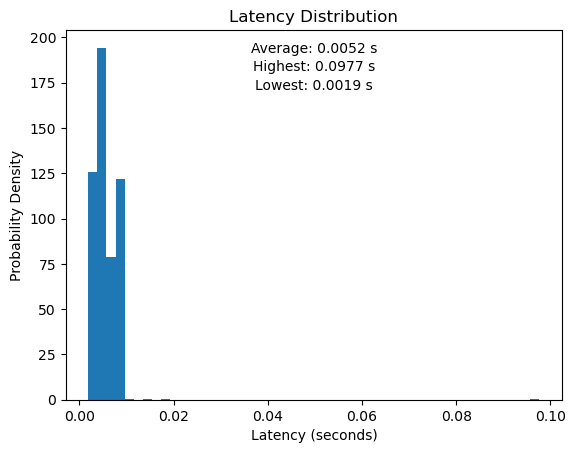

In [12]:
inference_times = []
for images, targets in trash_test_loader:
    images, targets = images.to(device), targets.to(device)
    start_time = time.time()
    with torch.no_grad():
        output = model(images)  # Add batch dimension
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

# Calculate statistics
avg_inference_time = np.mean(inference_times)
max_inference_time = np.max(inference_times)
min_inference_time = np.min(inference_times)

# Plot the latency distribution
plt.hist(inference_times, bins=50, density=True)
plt.xlabel('Latency (seconds)')
plt.ylabel('Probability Density')
plt.title('Latency Distribution')

plt.text(0.5, 0.95, f'Average: {avg_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.90, f'Highest: {max_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f'Lowest: {min_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

### Memory Footprint

In [13]:
# Measure memory footprint
with torch.no_grad():
    predictions = model(sample)
torch.cuda.reset_peak_memory_stats(device=device)
print("Memory Footprint:", torch.cuda.max_memory_allocated(device=device) / (1024 ** 2), "MB")

Memory Footprint: 113.86083984375 MB


### FPS Throughput

In [14]:
# Prepare input data (batch of images)
# (Ensure the input data is in the appropriate format expected by the model)
batch_size = 32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Measure inference time for a batch of images
total_time = 0.0
num_iterations = 100
for _ in range(num_iterations):
    start_time = time.time()
    with torch.no_grad():
        predictions = model(sample)
    inference_time = time.time() - start_time
    total_time += inference_time

# Compute FPS throughput
average_inference_time = total_time / num_iterations
fps = batch_size / average_inference_time
print("FPS Throughput:", fps)

FPS Throughput: 1463.3869903108666


In [15]:
# model.eval()  # Set the model to evaluation mode
# val_labels = []
# predicted_labels = []
# with torch.no_grad():
#     for images, labels in trash_test_loader:
#         images, labels = images.to(device), labels.to(device)
#         predictions = model(images)
#         _, preds = torch.max(predictions, 1)
#         val_labels.extend(labels.cpu().numpy())
#         predicted_labels.extend(preds.cpu().numpy())

# # Create confusion matrix
# conf_matrix = confusion_matrix(val_labels, predicted_labels)

# # Plot confusion matrix
# plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         plt.text(j, i, f'{conf_matrix[i, j]:.0f}\n({conf_matrix[i, j] / np.sum(conf_matrix[i]):.2%})',
#             horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

# plt.show()

### GFLOPS and Parameter size

In [16]:
# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of parameters:", num_params)

# Dummy inference to measure execution time
model.eval()
with torch.no_grad():
    start_time = time.time()
    output = model(sample)
    end_time = time.time()

# Calculate GFLOPs
execution_time = end_time - start_time
flops = num_params * 2  # Assuming one FLOP for each parameter multiplication and addition
gflops = (flops / execution_time) / 1e9  # Divide by 1e9 to convert to GFLOPs
print("GFLOPs:", gflops)

Number of parameters: 1525031
GFLOPs: 0.340073561774895


### Confusion Matrix on Clean Images

In [17]:
# model.eval()  # Set the model to evaluation mode
# val_labels = []
# predicted_labels = []
# with torch.no_grad():
#     for images, labels in trash_test_loader:
#         images = images.to(device)
#         predictions = model(images)
#         _, preds = torch.max(predictions, 1)
#         val_labels.extend(labels.cpu().numpy())
#         predicted_labels.extend(preds.cpu().numpy())

# # Create confusion matrix
# conf_matrix = confusion_matrix(val_labels, predicted_labels)

# # Plot confusion matrix
# plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# # for i in range(conf_matrix.shape[0]):
# #     for j in range(conf_matrix.shape[1]):
# #         plt.text(j, i, f'{conf_matrix[i, j]:.0f}\n({conf_matrix[i, j] / np.sum(conf_matrix[i]):.2%})',
# #             horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

# plt.show()

### Initialize Attack with Hyperparameters

In [18]:
# import torchattacks
# # Attack hyperparams

# epsilon = 8.0 / 255
# alpha = 2.0 / 255
# k = 10
# beta = 1

# # adversary = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=k)

### Confusion Matrix for Adversarial samples

In [19]:
# model.eval()  # Set the model to evaluation mode
# val_labels = []
# predicted_labels = []
# with torch.no_grad():
#     for images, labels in trash_test_loader:
#         images, labels = images.to(device), labels.to(device)
#         with torch.enable_grad():
#             adv_images = attack(images, labels)
#         predictions = model(adv_images)
#         _, preds = torch.max(predictions, 1)
#         val_labels.extend(labels.cpu().numpy().tolist())
#         predicted_labels.extend(preds.cpu().numpy().tolist())

# # Create confusion matrix
# conf_matrix = confusion_matrix(val_labels, predicted_labels)

# # Plot confusion matrix
# plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         plt.text(j, i, f'{conf_matrix[i, j]:.0f}\n({conf_matrix[i, j] / np.sum(conf_matrix[i]):.2%})',
#             horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

# plt.show()

### Precision, Recall, ROC, Precision-Recall Curve, Accuracy, Robust Accuracy, F1 Score

In [20]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.backends.cudnn as cudnn
# import torchvision
# import torchvision.models as models
# import torch.optim as optim
# import os
# import torchvision.transforms as transforms
# import torchvision.transforms.functional as TF
# from tqdm import tqdm
# from torch.utils.tensorboard import SummaryWriter
# import torch
# import torch.nn as nn
# from sklearn.metrics import f1_score, precision_score, precision_recall_curve, recall_score, roc_curve, auc
# import matplotlib.pyplot as plt
# import numpy as np


# # Assuming you have test_loader containing test data
# def evaluate_model(model, test_loader):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.eval()
#     all_targets = []
#     all_predictions = []
#     all_probs = []
#     all_adv_predictions = []
#     all_adv_probs = []

#     with torch.no_grad():
#         for inputs, targets in test_loader:
#             inputs, targets = inputs.to(device), targets.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             all_targets.extend(targets.cpu().numpy())
#             all_predictions.extend(predicted.cpu().numpy())
#             all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())
            
#             with torch.enable_grad():
#                 adv_images = attack(inputs, targets)
#             adv_output = model(adv_images)
#             # adv_outputs = model(adv)

#             _, adv_predicted = adv_output.max(1)
#             all_adv_predictions.extend(adv_predicted.cpu().numpy())
#             all_adv_probs.extend(torch.softmax(adv_output, dim=1).cpu().numpy())

#     f1 = f1_score(all_targets, all_predictions, average='macro')
#     precision = precision_score(all_targets, all_predictions, average='macro')
#     recall = recall_score(all_targets, all_predictions, average='macro')
#     adv_f1 = f1_score(all_targets, all_adv_predictions, average='macro')
#     adv_precision = precision_score(all_targets, all_adv_predictions, average='macro')

#     # Calculate top-1 accuracy
#     top1_accuracy = sum(1 for x, y in zip(all_predictions, all_targets) if x == y) / len(all_predictions)
#     top1_adv_accuracy = sum(1 for x, y in zip(all_adv_predictions, all_targets) if x == y) / len(all_predictions)


#     # Compute precision and recall for each class
#     all_targets = np.array(all_targets)
#     all_probs = np.array(all_probs)
#     precision_curve = dict()
#     recall_curve = dict()
#     for i in range(all_probs.shape[1]):
#         precision_curve[i], recall_curve[i], _ = precision_recall_curve(all_targets == i, all_probs[:, i])

#     # Compute ROC curve for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(all_probs.shape[1]):
#         fpr[i], tpr[i], _ = roc_curve(all_targets == i, all_probs[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     return f1, precision, top1_accuracy, fpr, tpr, roc_auc, precision_curve, recall_curve, top1_adv_accuracy, adv_f1, adv_precision, recall

# # Call the evaluate_model function with your trained model and test_loader
# f1, precision, top1_accuracy, fpr, tpr, roc_auc, precision_curve, recall_curve, top1_adv_accuracy, adv_f1, adv_precision, recall = evaluate_model(model, trash_test_loader)

# # Plot all ROC curves in a single graph
# plt.figure()
# for i in range(len(fpr)):
#     plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for all classes')
# plt.legend(loc="lower right")
# plt.show()

# # Plot all precision-recall curves in a single graph
# plt.figure()
# for i in range(len(precision_curve)):
#     plt.plot(recall_curve[i], precision_curve[i], lw=2, label='Class {}'.format(i))
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for all classes')
# plt.legend(loc="best")
# plt.show()

# # Print other metrics
# print('F1 score:', f1)
# print('Precision:', precision)
# print('Recall:', recall)
# print('Top-1 accuracy:', top1_accuracy)
# print('Top-1 adv_accuracy:', top1_adv_accuracy)
# print('adversarial F1 score:', adv_f1)
# print('adversarial Precision:', adv_precision)